# Cheminformatics & RDKit
In this notebook, we will follow Notebook 03 - Cheminformatics.ipynb from the Koch Group. 
https://github.com/kochgroup/intro_pharma_ai/blob/main/Notebooks_EN/03%20-%20Cheminformatics.ipynb#

### This lesson focuses on: 
* how to read smiles using rdkit
* how to manipulate molecules
* how to visualise molecules
* how to calculate molecule descriptors
* how to calculate the similarity of molecules using fingerprints.

The molecule of today will be **Sorafenib**, a kinase inhibitor used to treat advanced kidney cancer. 

In [1]:
sorafenib = "CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)C(F)F)Cl"
print(sorafenib)
type(sorafenib)

CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)C(F)F)Cl


str

## Install

In [2]:
# Install RDKit
!pip install rdkit==2022.3.4

## Draw

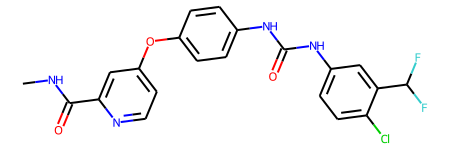

In [4]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

sorafenib = Chem.MolFromSmiles(sorafenib)
sorafenib # Shows an image of the molecule

In [5]:
type(sorafenib)

rdkit.Chem.rdchem.Mol

## Compare original vs generated SMILE

In [25]:
# Output molecule as SMILE again
sorafenib_gen = Chem.MolToSmiles(sorafenib)
print(sorafenib_gen)
len(sorafenib_gen)

CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)F)c3)cc2)ccn1


54

In [26]:
sorafenib_original = "CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)C(F)F)Cl"
print(sorafenib_original)
len(sorafenib_original)

CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)C(F)F)Cl


54

In [23]:
import numpy as np
def compare_smiles(original, rd_gen):
    """Function compares the original smile with the RDKit generated smile"""
    diff = ""
    for i in range(0, len(original)):
        if original[i] == rd_gen[i]:
            diff += " "
        else:
            diff += rd_gen[i]

    print(original)
    print(diff)


The difference between the original and rdkit generated SMILE is the representation of the aromatic rings: The c replaced the = as double bonds between carbons (C). 

In [24]:
compare_smiles(sorafenib_original, sorafenib_gen)

CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)C(F)F)Cl
            O 2ccc(NC(=O)Nc3ccc(Cl) (C(F)F)   cc2 ccn1


An invalid SMILE returns an error.

## Invalid and Replacements

In [27]:
# An invalid SMILE
Chem.MolFromSmiles('CNC(=[O-])c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1') # (=[O-]) instead of (=O)

[11:49:20] Explicit valence for atom # 3 O, 3, is greater than permitted


Atoms at specific indices can be replaced with other atoms.

In [29]:
# Replace a fluorine atom with a carbon atom
sorafenib.GetAtomWithIdx(29).SetAtomicNum(6)

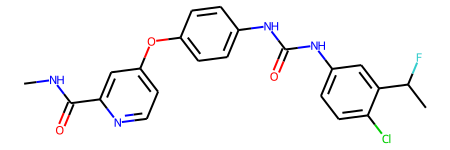

In [30]:
sorafenib

The outermost Flourine atom on the right side turned into a carbon (not explicitly marked).

## RDKIT

RDKit can find the number of atoms in the molecule.

In [33]:
sorafenib.GetNumAtoms()

31

RDKit assigns indices to atoms and bonds.

In [34]:
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices = False
IPythonConsole.molSize = (500, 500)

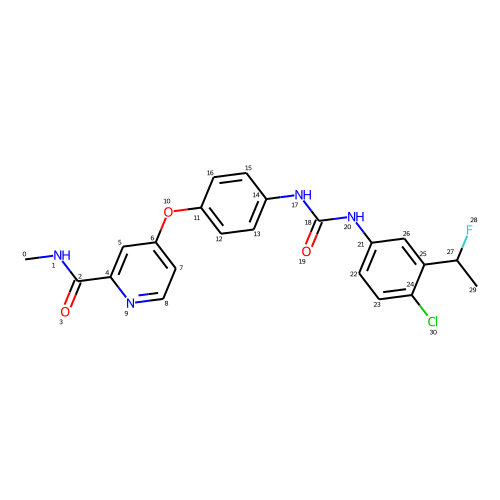

In [35]:
sorafenib

If we wanted to know more about item 3, we can find its symbol, mass and hybridisation.

Spoiler: It is an oxygen atom, of mass 15.999 and a SP2 hybridisation.

In [36]:
print("Symbol of atom with index 3")
print(sorafenib.GetAtomWithIdx(3).GetSymbol())

print("\nMass of atom with index 3")
print(sorafenib.GetAtomWithIdx(3).GetMass())

print("\nHybridization of atom with 3")
print(sorafenib.GetAtomWithIdx(3).GetHybridization())

Symbol of atom with index 3
O

Mass of atom with index 3
15.999

Hybridization of atom with 3
SP2


By changing some of the atoms, we can change the ketone into an imine. 

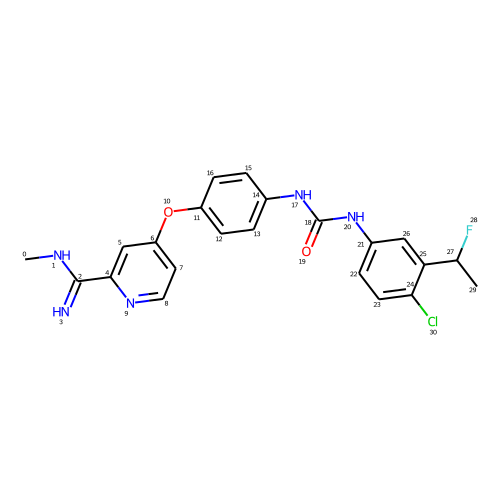

CNC(=N)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(C)F)c3)cc2)ccn1


In [37]:
sorafenib.GetAtomWithIdx(3).SetAtomicNum(7)
display(sorafenib)
print(Chem.MolToSmiles(sorafenib))
sorafenib.GetAtomWithIdx(3).SetAtomicNum(8)

Similar visualisation can be done with bonds.

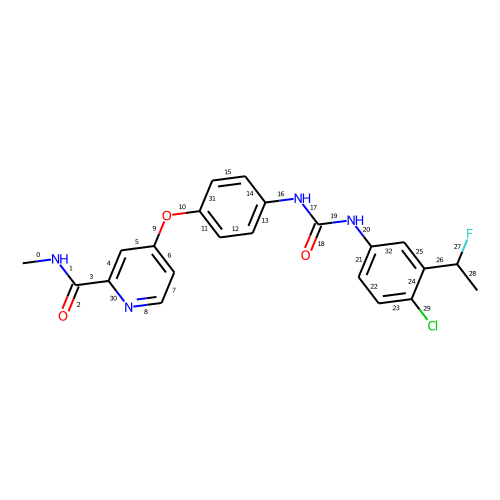

In [38]:
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addBondIndices = True
sorafenib

In [39]:
print("Which type of bond is bond 4")
print(sorafenib.GetBondWithIdx(4).GetBondType())

print("\nIs bond 4 in a ring of size 7")
print(sorafenib.GetBondWithIdx(4).IsInRingSize(7))

print("\nIs bond 4 in a ring of size 6")
print(sorafenib.GetBondWithIdx(4).IsInRingSize(6))

IPythonConsole.drawOptions.addBondIndices = False

Which type of bond is bond 4
AROMATIC

Is bond 4 in a ring of size 7
False

Is bond 4 in a ring of size 6
True


## Descriptors

In [43]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP

print("LogP", round(MolLogP(sorafenib),2))
print("Molecular Weight", round(MolWt(sorafenib),2))

LogP 5.13
Molecular Weight 439.85


## Sorafenib Alternatives

In [44]:
smiles = [
    "CNC(=O)c1cc(Oc2ccc(NC(=S)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
    "C[C@@H](NC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1)C(=O)NO",
    "CNC(=O)c1cc(Oc2ccc(NC(=S)Nc3cc(C(F)(F)F)cc(C(F)(F)F)c3)cc2)ccn1",
    "N#Cc1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
    "CN(C)c1ccc(NC(=O)c2cc(Oc3ccc(NC(=O)Nc4ccc(Cl)c(C(F)(F)F)c4)cc3)ccn2)cc1", 
    "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Br)c(C(F)(F)F)c3)cc2)ccn1",
    "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(OC(F)(F)F)cc3)cc2)ccn1",
    "CCNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
    "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3cccc(C(F)(F)F)c3)cc2)ccn1"
]

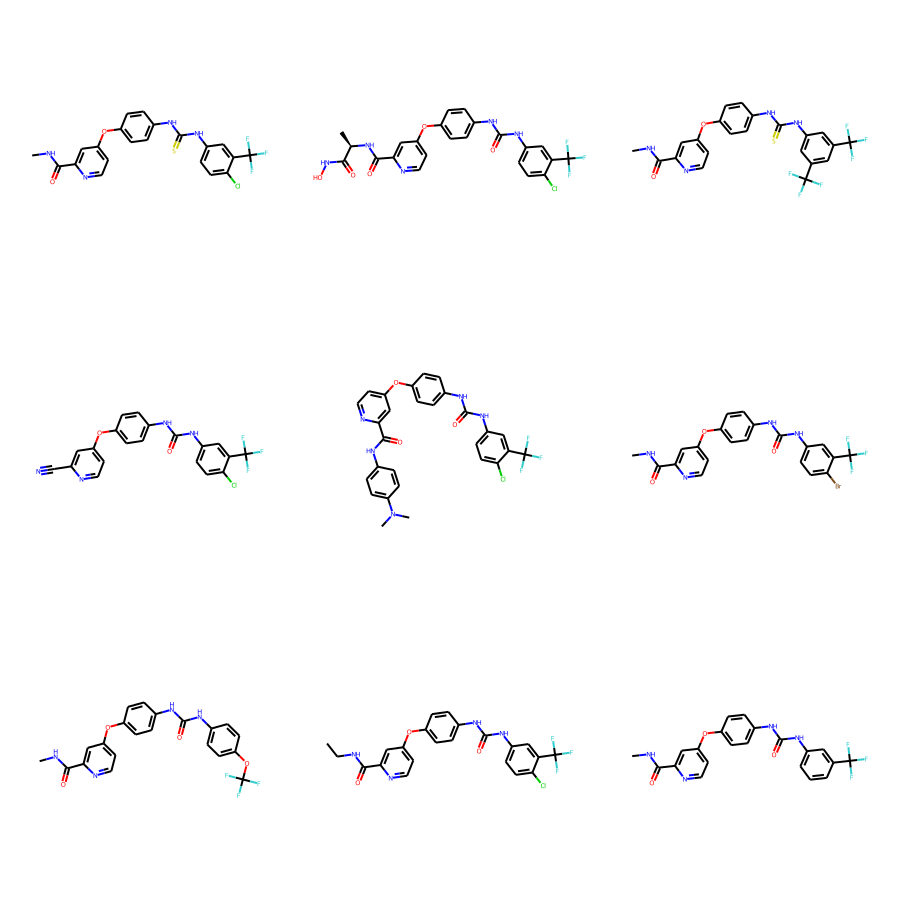

In [45]:
mols = [ Chem.MolFromSmiles(x) for x in smiles]
Draw.MolsToGridImage(mols, subImgSize = (300,300))

## Lipinski Rule of Five
The lipinski rule of five states that molecules have four specific properties well suited as active ingredients:

1. 0-5 hydrogen bond donors (mainly NH or OH bonds)
2. 0-10 hydrgoen bond acceptors (mainly N or O atoms)
3. MW less than 500 g/mol
4. A logP value less than 5


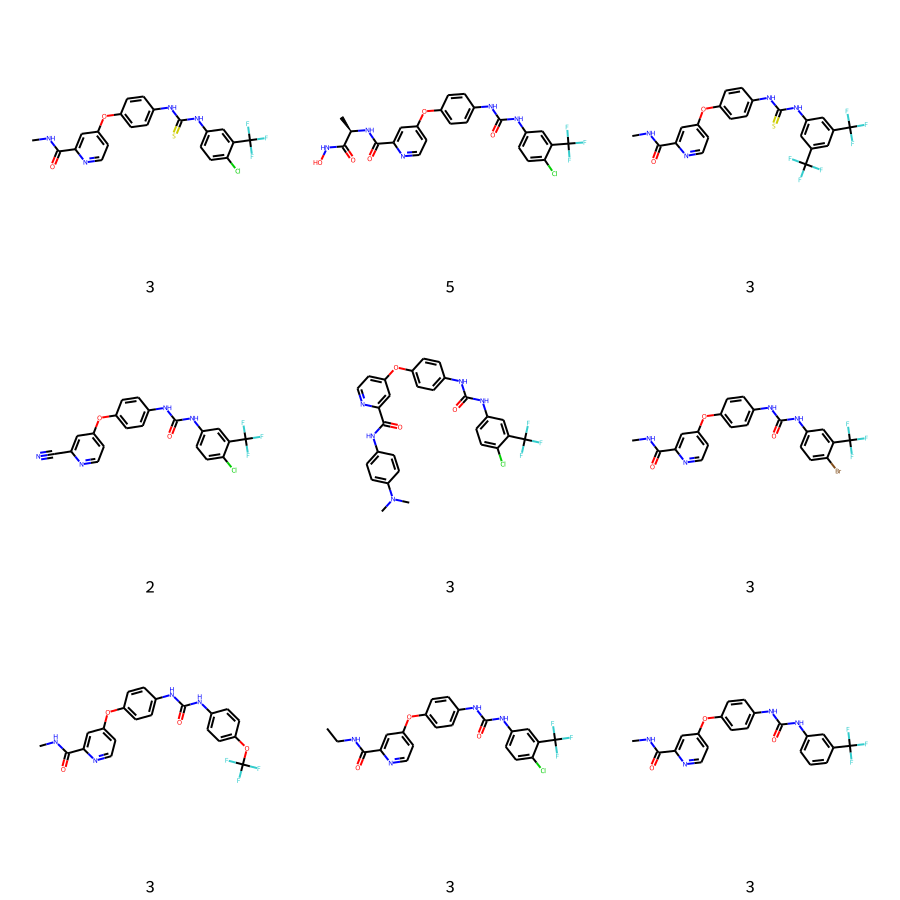

In [48]:
# 0-5 hydrogen bond donors, 0-10 hydrogen bond acceptors
from rdkit.Chem.Lipinski import NumHAcceptors, NumHDonors

NumDonors = [NumHDonors(x) for x in mols]
NumDonors = [str(x) for x in NumDonors]
Draw.MolsToGridImage(mols, legends = NumDonors,subImgSize = (300,300))

Molecules have a mode number of donors of 3. None above 5.

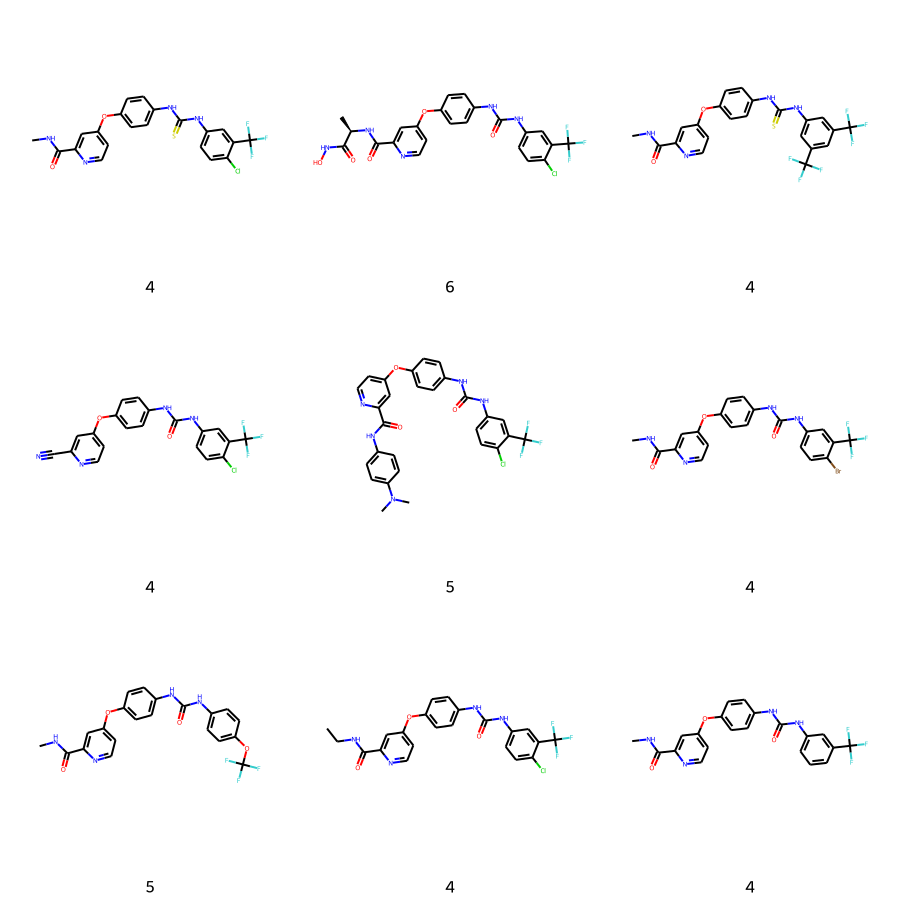

In [52]:
# 0-10 acceptors
NumAcceptors = [NumHAcceptors(x) for x in mols]
NumAcceptors = [str(x) for x in NumAcceptors] # convert ints into strings
Draw.MolsToGridImage(mols, legends = NumAcceptors,subImgSize = (300,300)) # input strings

Average number of acceptors is 5, with a range of 4-6. 

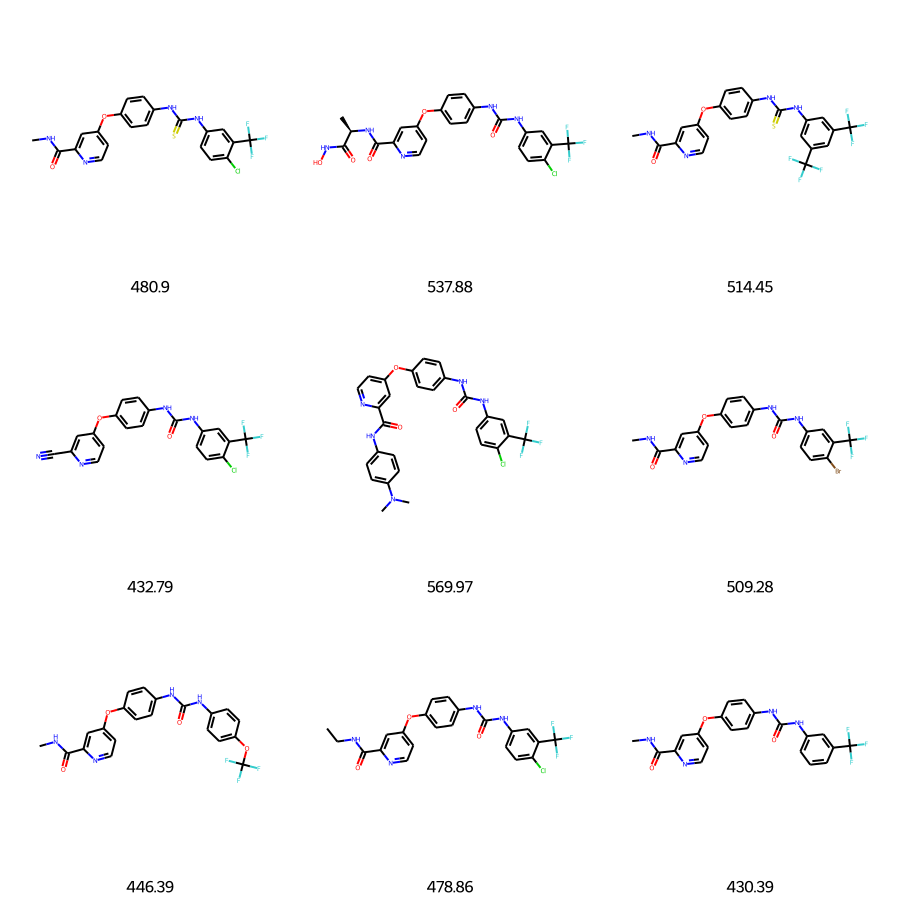

In [56]:
# Mol Weight
molWeight = [str(round(MolWt(x),2)) for x in mols] # write your solution here
Draw.MolsToGridImage(mols, legends = molWeight, subImgSize=(300, 300))

4 / 9 molecules have a molecular weight above 500 g/mol.

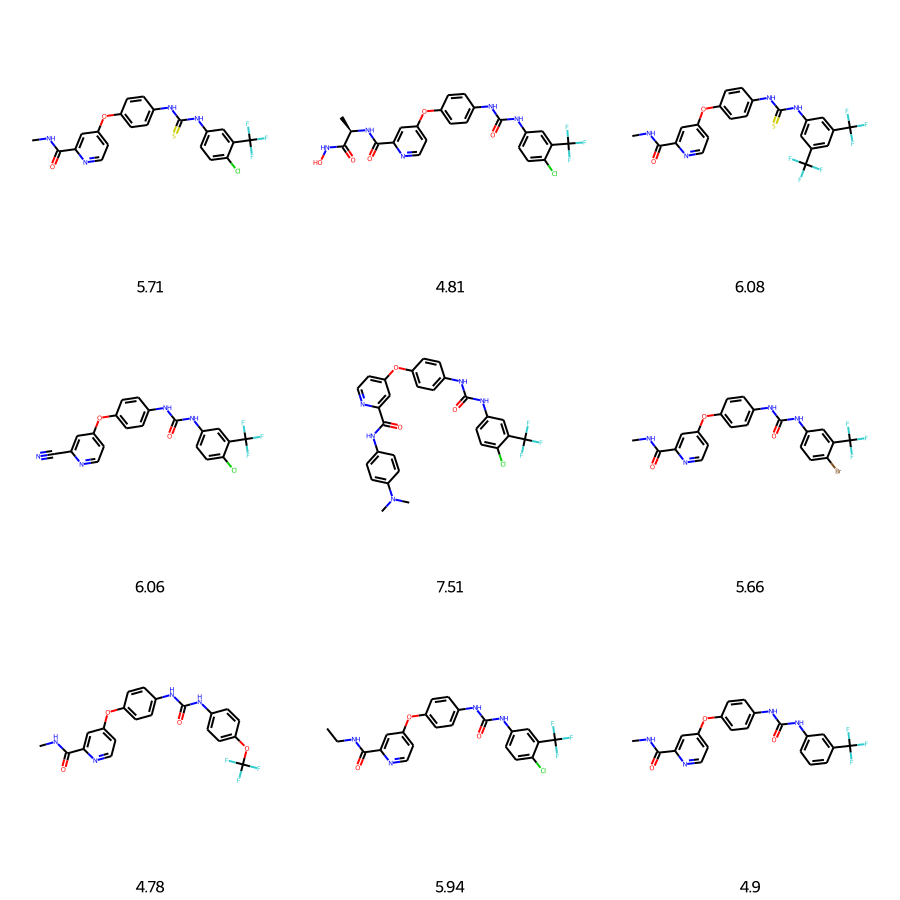

In [57]:
# LogP
molWeight = [str(round(MolLogP(x),2)) for x in mols] # write your solution here
Draw.MolsToGridImage(mols, legends = molWeight, subImgSize=(300, 300))

6/9 molecules go against Lipinski`s fourth rule: No LogP above 5. 

### Filter 

In [58]:
logP = [MolLogP(x) for x in mols]
logP = np.array(logP)
logP < 5.0

array([False,  True, False, False, False, False,  True, False,  True])

In [59]:
molWeight = [MolWt(x) for x in mols]
molWeight = np.array(molWeight)
molWeight < 500.0

array([ True, False, False,  True, False, False,  True,  True,  True])

In [64]:
(logP < 5) | (molWeight<500)

array([ True,  True, False,  True, False, False,  True,  True,  True])

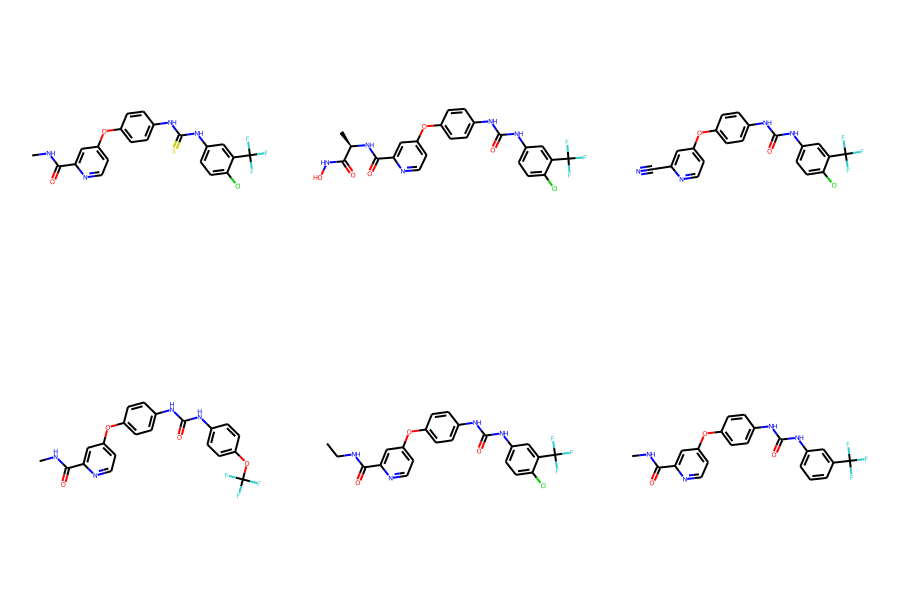

In [65]:
mols=np.array(mols)
mols_subset=mols[(logP < 5) | (molWeight<500)] # we convert the mol-list to an array
Draw.MolsToGridImage(mols_subset, subImgSize=(300, 300))

## Fingerprints and Similarity Search

RDKit can compute different molecular fingerprints, such as Extended Connectectivity Fingerprints (ECFP) or the modified Morgan Fingerprint.

The Tanimoto similarity then computes how similar two molecules are. 0.0 means they are not similar at all, 1.0 the opposite. 

In [66]:
from rdkit import DataStructs
fp_sorafenib = Chem.GetMorganFingerprint(sorafenib, radius = 2)
fp_sorafenib

In [67]:
fp_mols = [Chem.GetMorganFingerprint(x, radius = 2) for x in mols]

In [69]:
DataStructs.TanimotoSimilarity(fp_sorafenib, fp_mols[1])

0.6434782608695652

In [72]:
sorafenib_similarity = [round(DataStructs.TanimotoSimilarity(fp_sorafenib, x),3) for x in fp_mols]
sorafenib_similarity

[0.676, 0.643, 0.525, 0.583, 0.579, 0.709, 0.654, 0.689, 0.689]

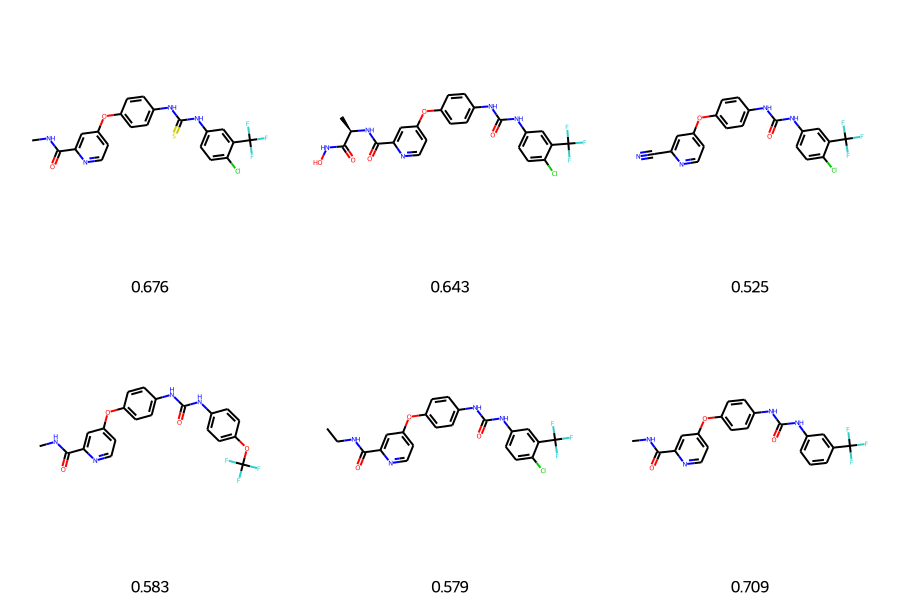

In [73]:
Draw.MolsToGridImage(mols_subset,legends = [str(x) for x in sorafenib_similarity],subImgSize=(300, 300))


A rule of thumb to define an alternative is a Tanimoto score above 0.8. This does not apply to any of these molecules. 

## Alternatives for the Norfloxacin Antibiotic
Norfloxacin is a snythetic borad-spectrum antibiotic for oral administration.

In [74]:
# All the necessary imports
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Descriptors import MolWt 
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.Lipinski import NumHAcceptors, NumHDonors
from rdkit import DataStructs

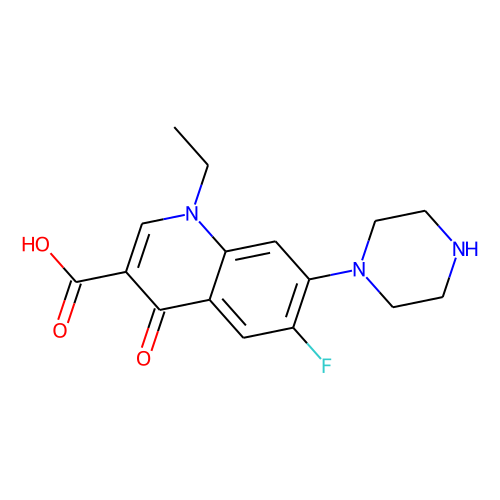

In [77]:
norfloxacin = "CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O"
# convert the string to mol
norfloxacin = Chem.MolFromSmiles(norfloxacin)
# display the molecule
norfloxacin

In [81]:
#Descriptors
# Calculate MW
MW_norfloxacin = MolWt(norfloxacin)

# Calculate the number of H-bond acceptors
NumHAcceptors_norfloxacin = NumHAcceptors(norfloxacin)

# Calculate the number of H-bond donors
NumHDonors_norfloxacin = NumHDonors(norfloxacin)

# Calculate logP
logP_norfloxacin = MolLogP(norfloxacin)

In [82]:
print("MW:", MW_norfloxacin)
print("NumHAcceptors", NumHAcceptors_norfloxacin)
print("NumHDonors", NumHDonors_norfloxacin)
print("LogP",logP_norfloxacin)

MW: 319.336
NumHAcceptors 5
NumHDonors 2
LogP 1.2683


In [83]:
# Don't forget to run this cell.
quinolones = ["C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O",
             "CN1CCN(CC1)C2=C(C=C3C(=C2F)N(C=C(C3=O)C(=O)O)CCF)F",
             "CCN1C=C(C(=O)C2=CC(=C(C(=C21)F)N3CCNC(C3)C)F)C(=O)O",
             "CC1CCC2=C3N1C=C(C(=O)C3=CC(=C2N4CCC(CC4)O)F)C(=O)O",
             "CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O"
             "CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCN(CC3)C)F)C(=O)O",
             "CN1CCN(CC1)C2=C(C=C3C4=C2SCCN4C=C(C3=O)C(=O)O)F",
             "CCN1C=C(C(=O)C2=CC(=C(N=C21)N3CCNCC3)F)C(=O)O",
             "CNC1CCCN(C1)C2=C(C=C3C(=C2OC)N(C=C(C3=O)C(=O)O)C4CC4)F",
             "CC1CN(CCN1)C2=C(C(=C3C(=C2)N(C=C(C3=O)C(=O)O)C4CC4)C)F",
             "C[C@H]1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O",
             "C[C@H]1COC2=C3N1C=C(C(=O)C3=CC(=C2C4(CC4)N)F)C(=O)O",
             "C[C@@H]1CN(C[C@@H](N1)C)C2=C(C(=C3C(=C2F)N(C=C(C3=O)C(=O)O)C4CC4)N)F",
             "CC1CN(CCN1)C2=C(C=C3C(=C2)N(C=C(C3=O)C(=O)O)C4=C(C=C(C=C4)F)F)F",
             "C1CN(CC1N)C2=C(C=C3C(=O)C(=CN(C3=N2)C4=C(C=C(C=C4)F)F)C(=O)O)F"]

In [85]:
# Convert the strings to mol
quinolones = [Chem.MolFromSmiles(x) for x in quinolones]

In [86]:
# Calculate the four descriptors for all molecules in the list
MW_quinolones = [MolWt(x) for x in quinolones]
NumHAcceptors_quinolones = [NumHAcceptors(x) for x in quinolones]
NumHDonors_quinolones = [NumHDonors(x) for x in quinolones]
logP_quinolones = [MolLogP(x) for x in quinolones]

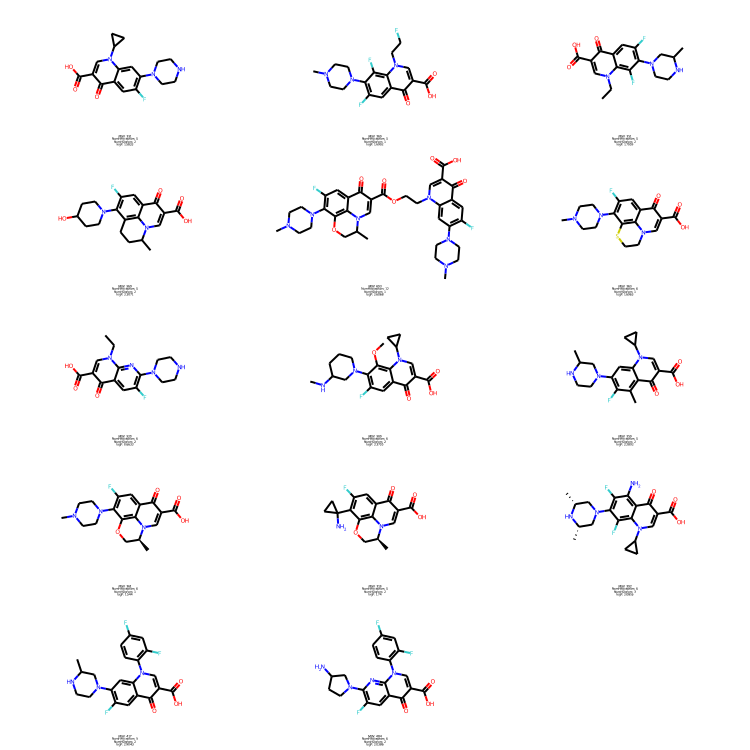

In [87]:
legend = []
for i in range(len(MW_quinolones)):
    legend.append("MW: "+str(round(MW_quinolones[i]))+"\n"+
                 "NumHAcceptors: "+str(NumHAcceptors_quinolones[i])+"\n"+
                 "NumHDonors: "+str(NumHDonors_quinolones[i])+"\n"+
                 "logP: "+str(round(logP_quinolones[i], 4)))

Draw.MolsToGridImage(quinolones, molsPerRow=3, legends = legend,
                    subImgSize=(250,150), useSVG=True)

In [90]:
# First calculate the fingerprints of the quinolones and norfloxacin.
norfloxacin_fp = Chem.GetMorganFingerprint(norfloxacin, radius = 2)
quinolones_fp = [Chem.GetMorganFingerprint(x, radius = 2) for x in quinolones]

In [ ]:
quinolones_similarity = [DataStructs.TanimotoSimilarity(norfloxacin_fp, x]